In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from datetime import datetime
import dask.dataframe as dd
from wordcloud import WordCloud, STOPWORDS

In [22]:
df = pd.read_csv('C:/Users/chimi/Desktop/Python Data Science Projects/airbnb-rentalprice/task 2- cleaning the data/merged_athensrental.csv')

In [23]:
df.shape

(498987, 18)

In [24]:
df.head(5)

,listing_id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,reviewer_id,date,comments
0,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,2023-06-17,0.28,7,139,8,189305.0,2011-05-20,"The apartment was wonderful, fully equiped, be..."
1,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,2023-06-17,0.28,7,139,8,289831.0,2012-08-15,Emmanouil was an excellent host. He provided u...
2,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,2023-06-17,0.28,7,139,8,2422327.0,2014-05-04,"Our stay in Emmanouil home was comfortable, qu..."
3,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,2023-06-17,0.28,7,139,8,2635427.0,2013-05-20,"Manos is a very good host, he is kind and help..."
4,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,2023-06-17,0.28,7,139,8,5001999.0,2022-07-02,"Highly recommend this apartment! Clean, bright..."


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498987 entries, 0 to 498986
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   listing_id                      498987 non-null  int64  
 1   name                            498987 non-null  object 
 2   host_id                         498987 non-null  int64  
 3   neighbourhood                   498987 non-null  object 
 4   latitude                        498987 non-null  float64
 5   longitude                       498987 non-null  float64
 6   room_type                       498987 non-null  object 
 7   price                           498987 non-null  int64  
 8   minimum_nights                  498987 non-null  int64  
 9   number_of_reviews               498987 non-null  int64  
 10  last_review                     498987 non-null  object 
 11  reviews_per_month               498987 non-null  float64
 12  calculated_host_

In [26]:
# Replace the unexpected characters
df['name'] = df['name'].str.replace('Â·', '·').str.replace('â˜…', '★')

df_split = df['name'].str.split(' · ', expand=True)

# The property type and city are always present
df_split_property = df_split[0].str.split(' in ', expand=True)
df['property_type'] = df_split_property[0]
df['city'] = df_split_property[1]

# The rating is always present
df['rating'] = df_split[1].str.replace('★', '') 

In [27]:
# Bedrooms, beds, and baths may not be present in all rows
df['bedrooms'] = df_split[2].str.extract('(\d+)')[0] if 2 in df_split.columns else None
df['beds'] = df_split[3].str.extract('(\d+)')[0] if 3 in df_split.columns else None
df['baths'] = df_split[4].str.extract('(\d+)')[0] if 4 in df_split.columns else None

In [28]:
df.head(5)

,listing_id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,number_of_reviews_ltm,reviewer_id,date,comments,property_type,city,rating,bedrooms,beds,baths
0,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,189305.0,2011-05-20,"The apartment was wonderful, fully equiped, be...",Condo,Athens,4.83,3,5,2
1,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,289831.0,2012-08-15,Emmanouil was an excellent host. He provided u...,Condo,Athens,4.83,3,5,2
2,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,2422327.0,2014-05-04,"Our stay in Emmanouil home was comfortable, qu...",Condo,Athens,4.83,3,5,2
3,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,2635427.0,2013-05-20,"Manos is a very good host, he is kind and help...",Condo,Athens,4.83,3,5,2
4,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,5001999.0,2022-07-02,"Highly recommend this apartment! Clean, bright...",Condo,Athens,4.83,3,5,2


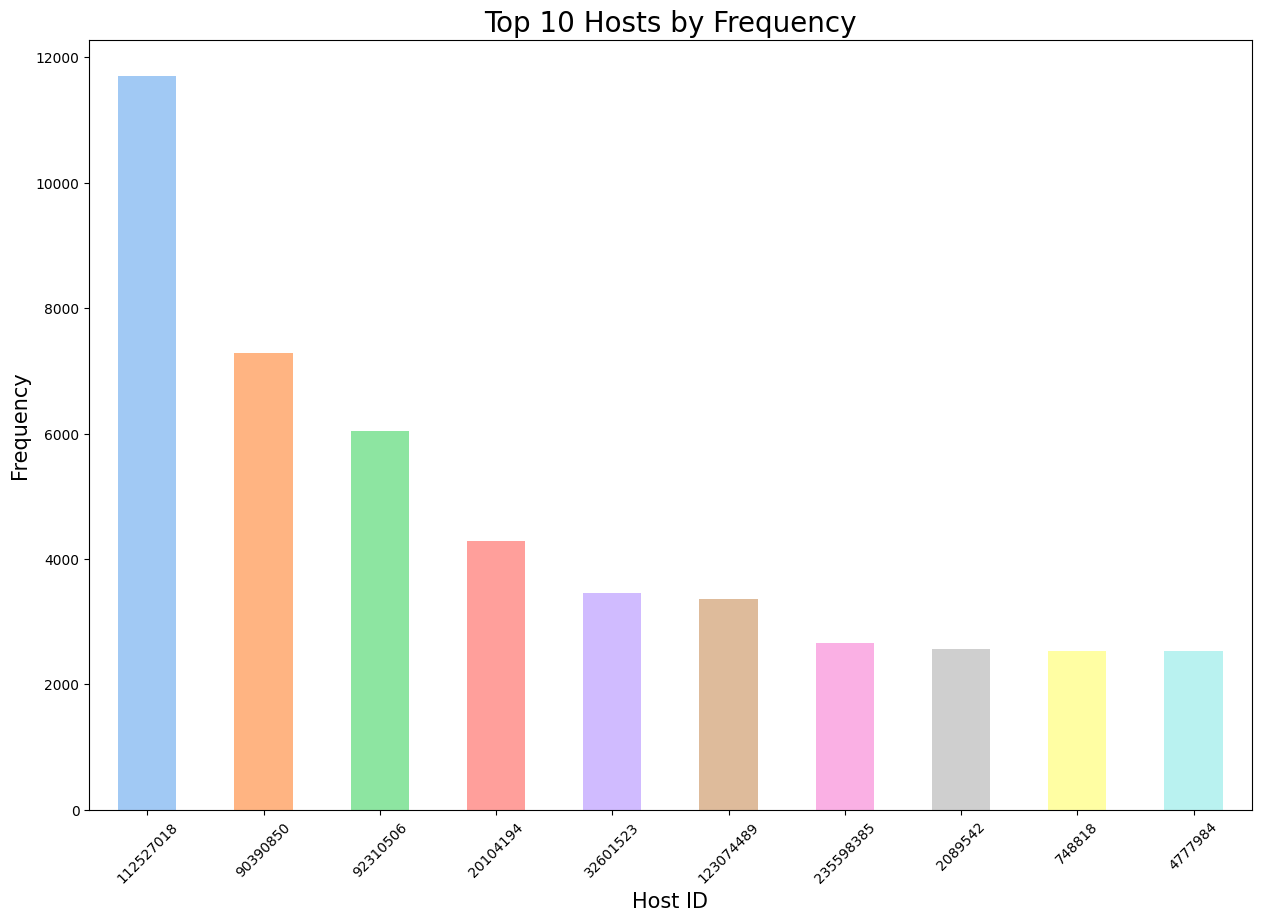

In [29]:
# Who are the top 10 hosts by listing frequency?


# Count the frequency of each host_id and take the top 10
top_10_hosts = df['host_id'].value_counts()[:10]

# Generate a color palette
colors = sns.color_palette('pastel')[0:10]

# Plot the data
plt.figure(figsize=(15, 10))
ax = top_10_hosts.plot(kind='bar', color=colors)
plt.xlabel('Host ID', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Top 10 Hosts by Frequency', fontsize=20)
plt.xticks(rotation=45)

# Show the plot
plt.show()

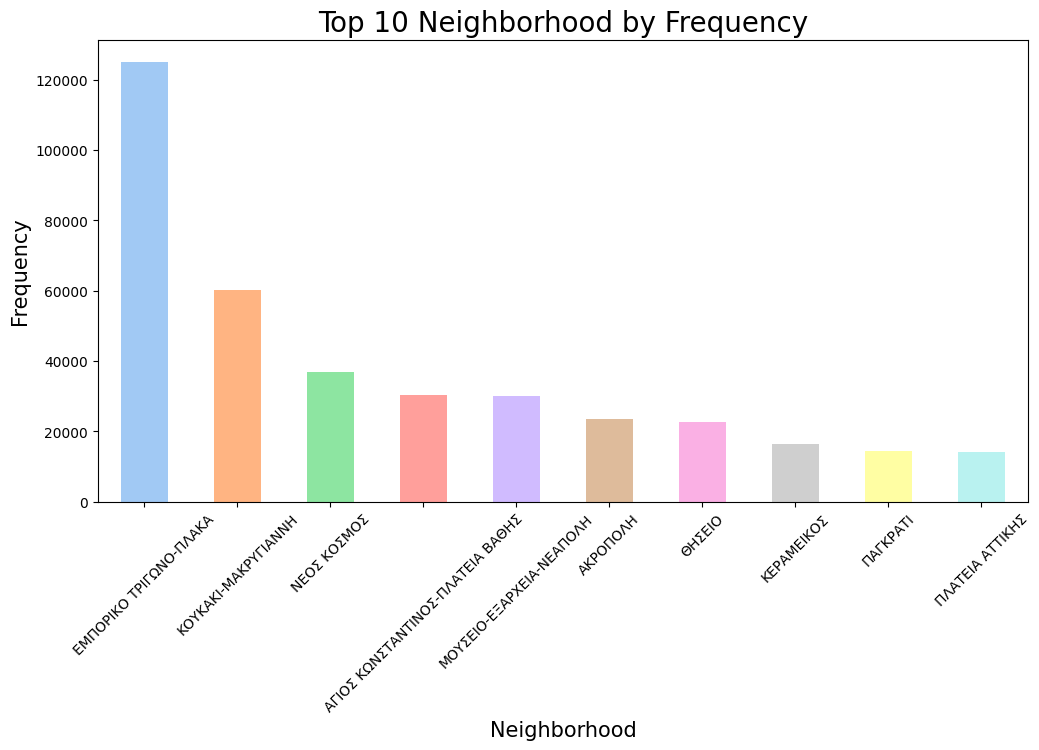

In [30]:
# Which are the top 10 most popular neighborhoods?


top_10_neigh = df['neighbourhood'].value_counts()[:10]

# Generate a color palette
colors = sns.color_palette('pastel')[0:10]

# Plot the data
plt.figure(figsize=(12,6))
ax = top_10_neigh.plot(kind='bar', color=colors)
plt.xlabel('Neighborhood', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Top 10 Neighborhood by Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [31]:
# Reviewers_id
print("Unique reviewers: ", len(df["reviewer_id"].unique()))
print("Total reviews: ", len(df))

Unique reviewers:  498987
Total reviews:  498987


In [32]:
# Top 10 reviewers
df['reviewer_id'].value_counts().iloc[:10]

189305.0       1
137885575.0    1
189010912.0    1
188880923.0    1
184979431.0    1
183579612.0    1
183279737.0    1
181239564.0    1
178810659.0    1
174945187.0    1
Name: reviewer_id, dtype: int64

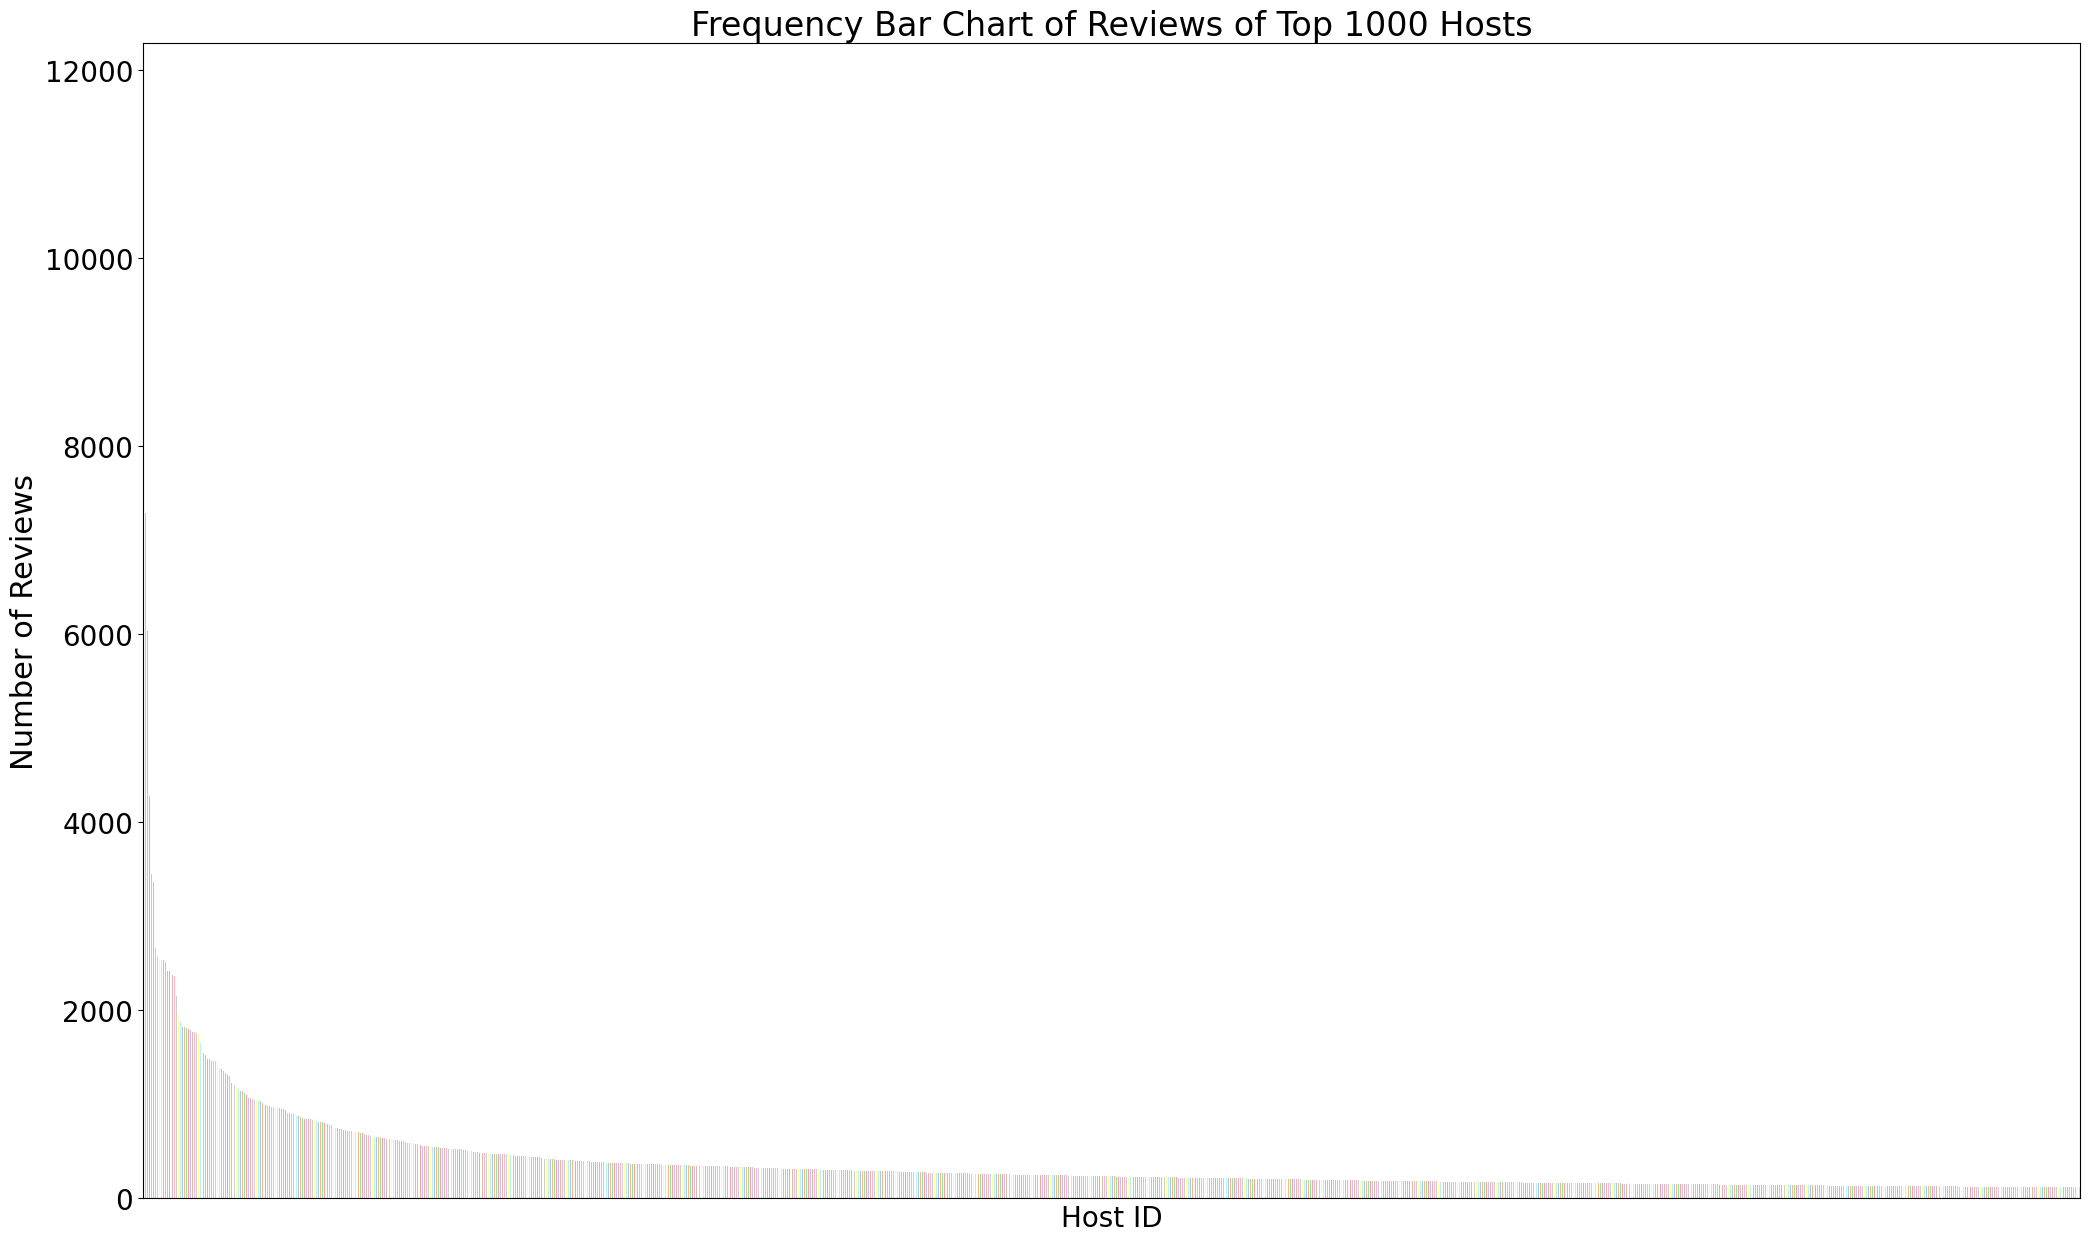

In [33]:
# How often have the top 10 reviewers posted reviews?

# Calculate the top 1000 hosts by review count
top_1000_hosts = df['host_id'].value_counts().nlargest(1000)

# Create a color palette with as many colors as there are hosts
colors = sns.color_palette('pastel', n_colors=len(top_1000_hosts))

# Create a new figure
fig, ax = plt.subplots(figsize=(25, 15))

# Plot the data using a bar chart
top_1000_hosts.plot(kind='bar', color=colors, ax=ax)

# Configure the y-axis
ax.tick_params(axis="y", labelsize=20)

# Hide the x-axis
ax.tick_params(axis='x', bottom=False, top=False, labelbottom=False)

# Set labels and title
ax.set_title('Frequency Bar Chart of Reviews of Top 1000 Hosts', fontsize=24)
ax.set_ylabel('Number of Reviews', fontsize=22)
ax.set_xlabel('Host ID', fontsize=20)

# Display the plot
plt.show()

In [34]:
df['room_type'].value_counts()

Entire home/apt    473070
Private room        22949
Hotel room           2040
Shared room           928
Name: room_type, dtype: int64

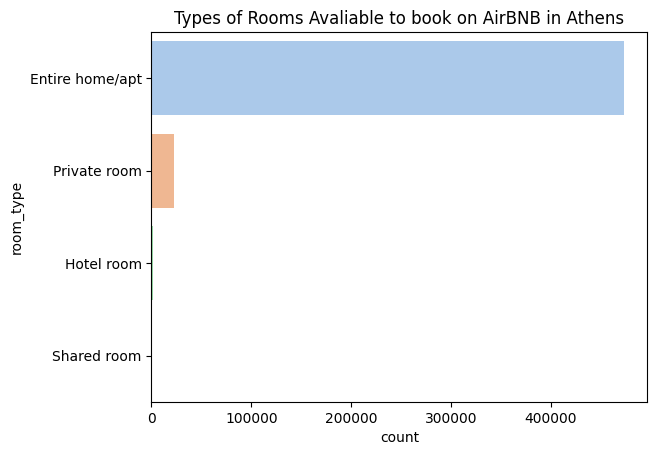

In [35]:
# What type of rooms are avaliable to book on Greece?
plt.figure()
sns.countplot(y='room_type', data=df, palette='pastel')
plt.title('Types of Rooms Avaliable to book on AirBNB in Athens')
plt.show()

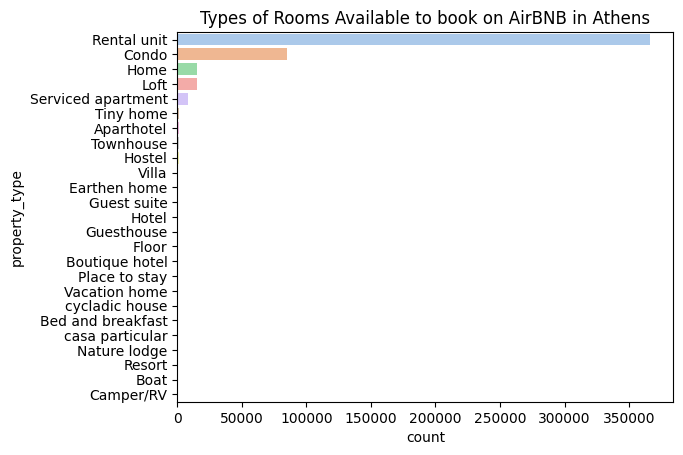

In [36]:
# What type of properties are avaliable to book on airbnb?

# Order the categories based on their counts
order = df['property_type'].value_counts().index

plt.figure()
sns.countplot(y='property_type', data=df, palette='pastel', order=order)
plt.title('Types of Rooms Available to book on AirBNB in Athens')
plt.show()


In [37]:
# Comments 
# Verify there are 0 blanks strings in comments
len(df[df['comments'] == "  "])

0

In [38]:
# Create a Dask DataFrame from the pandas DataFrame
ddf = dd.from_pandas(df, npartitions=4)  # you can adjust the number of partitions based on your system

# Define a function to apply to each partition
def split_stack(df):
    return df['comments'].str.split(expand=True).stack()

# Apply the function to each partition
result = ddf.map_partitions(split_stack).value_counts().compute()


In [39]:
print(result)

and                        828608
the                        758476
to                         509668
a                          492645
was                        375249
                            ...  
Great!<br/>Well                 1
Great!<br/>we                   1
legend!<br/>Super               1
Great!<br/>非常好！周围有很多好餐厅         1
braucht                        1
Length: 547066, dtype: int64


In [40]:
df['comments'] = df['comments'].str.replace('([^\x00-\x7F])+', ' ') # Remove symbols + chinese characters


C:\Users\chimi\AppData\Local\Temp\ipykernel_20124\1174934343.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comments'] = df['comments'].str.replace('([^\x00-\x7F])+', ' ') # Remove symbols + chinese characters


In [41]:
df['comments'] = df['comments'].str.lower()  # Lower Case
df['comments'] = df['comments'].fillna(' ')  # Replace NaN values with spaces
df['comments'] = df['comments'].str.replace('[^\w\s]', '', regex=True)  # Remove all punctuation
df["comments"] = df["comments"].str.replace('\n', '')  # Remove line break
df['comments'] = df['comments'].str.replace('([^\x00-\x7F])+', ' ', regex=True)  # Remove non-ASCII characters
df['comments'] = df['comments'].str.replace('[\u0370-\u03FF]+', ' ', regex=True)  # Remove Greek characters
df["comments"] = df["comments"].str.encode('ascii', 'ignore').str.decode('ascii')  # Retain ascii characters, removing foreign characters and emojis
df["comments"] = df["comments"].apply(lambda x: ' '.join(x.split()))  # Replace multiple whitespaces with 1 whitespace


In [43]:
# Strip blank strings
len(df[df['comments'].str.strip() == ""])


37389

In [44]:
df = df[df["comments"].str.strip() != ""]

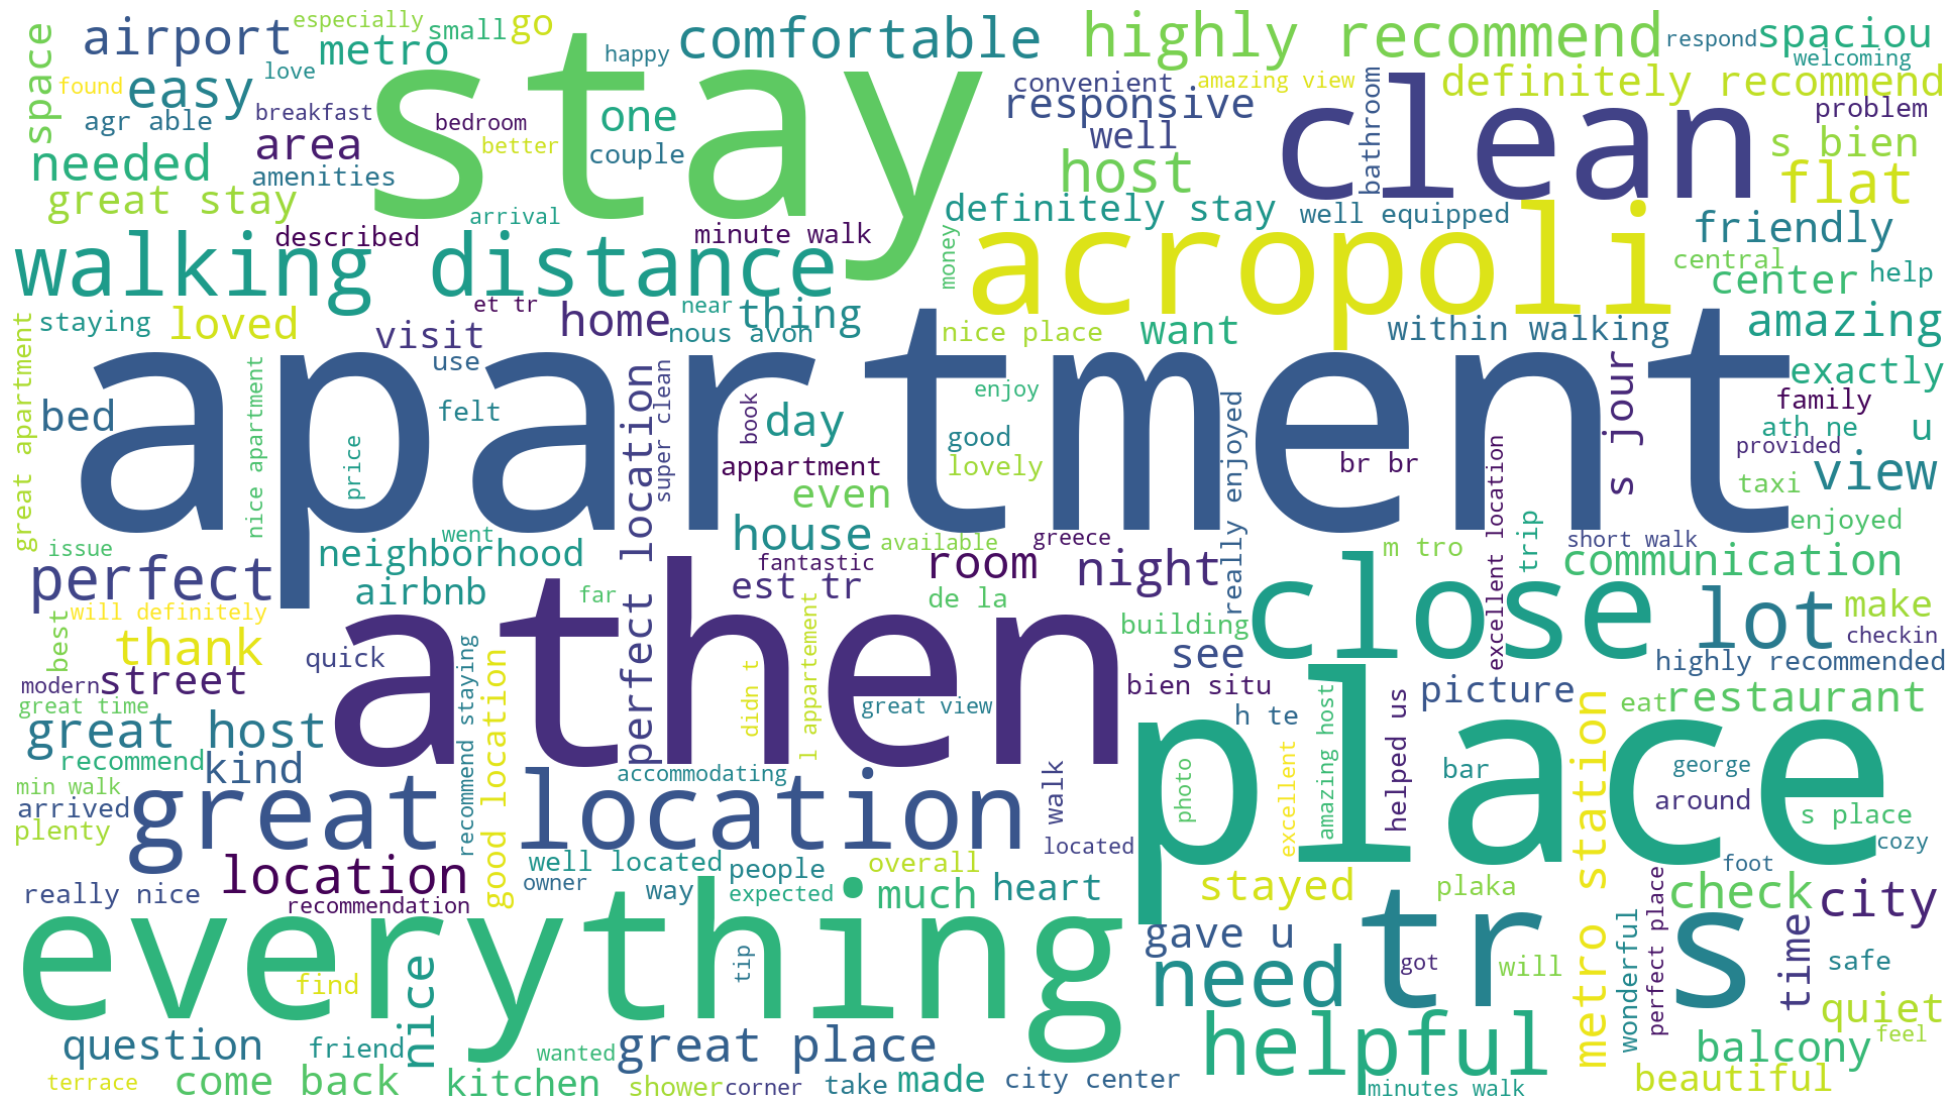

<Figure size 640x480 with 0 Axes>

In [26]:
texts = df['comments'].values
# Convert array to string
texts = ' '.join(map(str, texts))

stopwords = set(STOPWORDS)

# Generate WordCloud
wc_names = WordCloud(width = 1920, height = 1080, stopwords=stopwords, background_color='white').generate(texts)

# Plotting
plt.figure(figsize=(25,15), facecolor=None)
plt.imshow(wc_names, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig('commentsWordCloud1.png', bbox_inches = 'tight', pad_inches = 0.1)


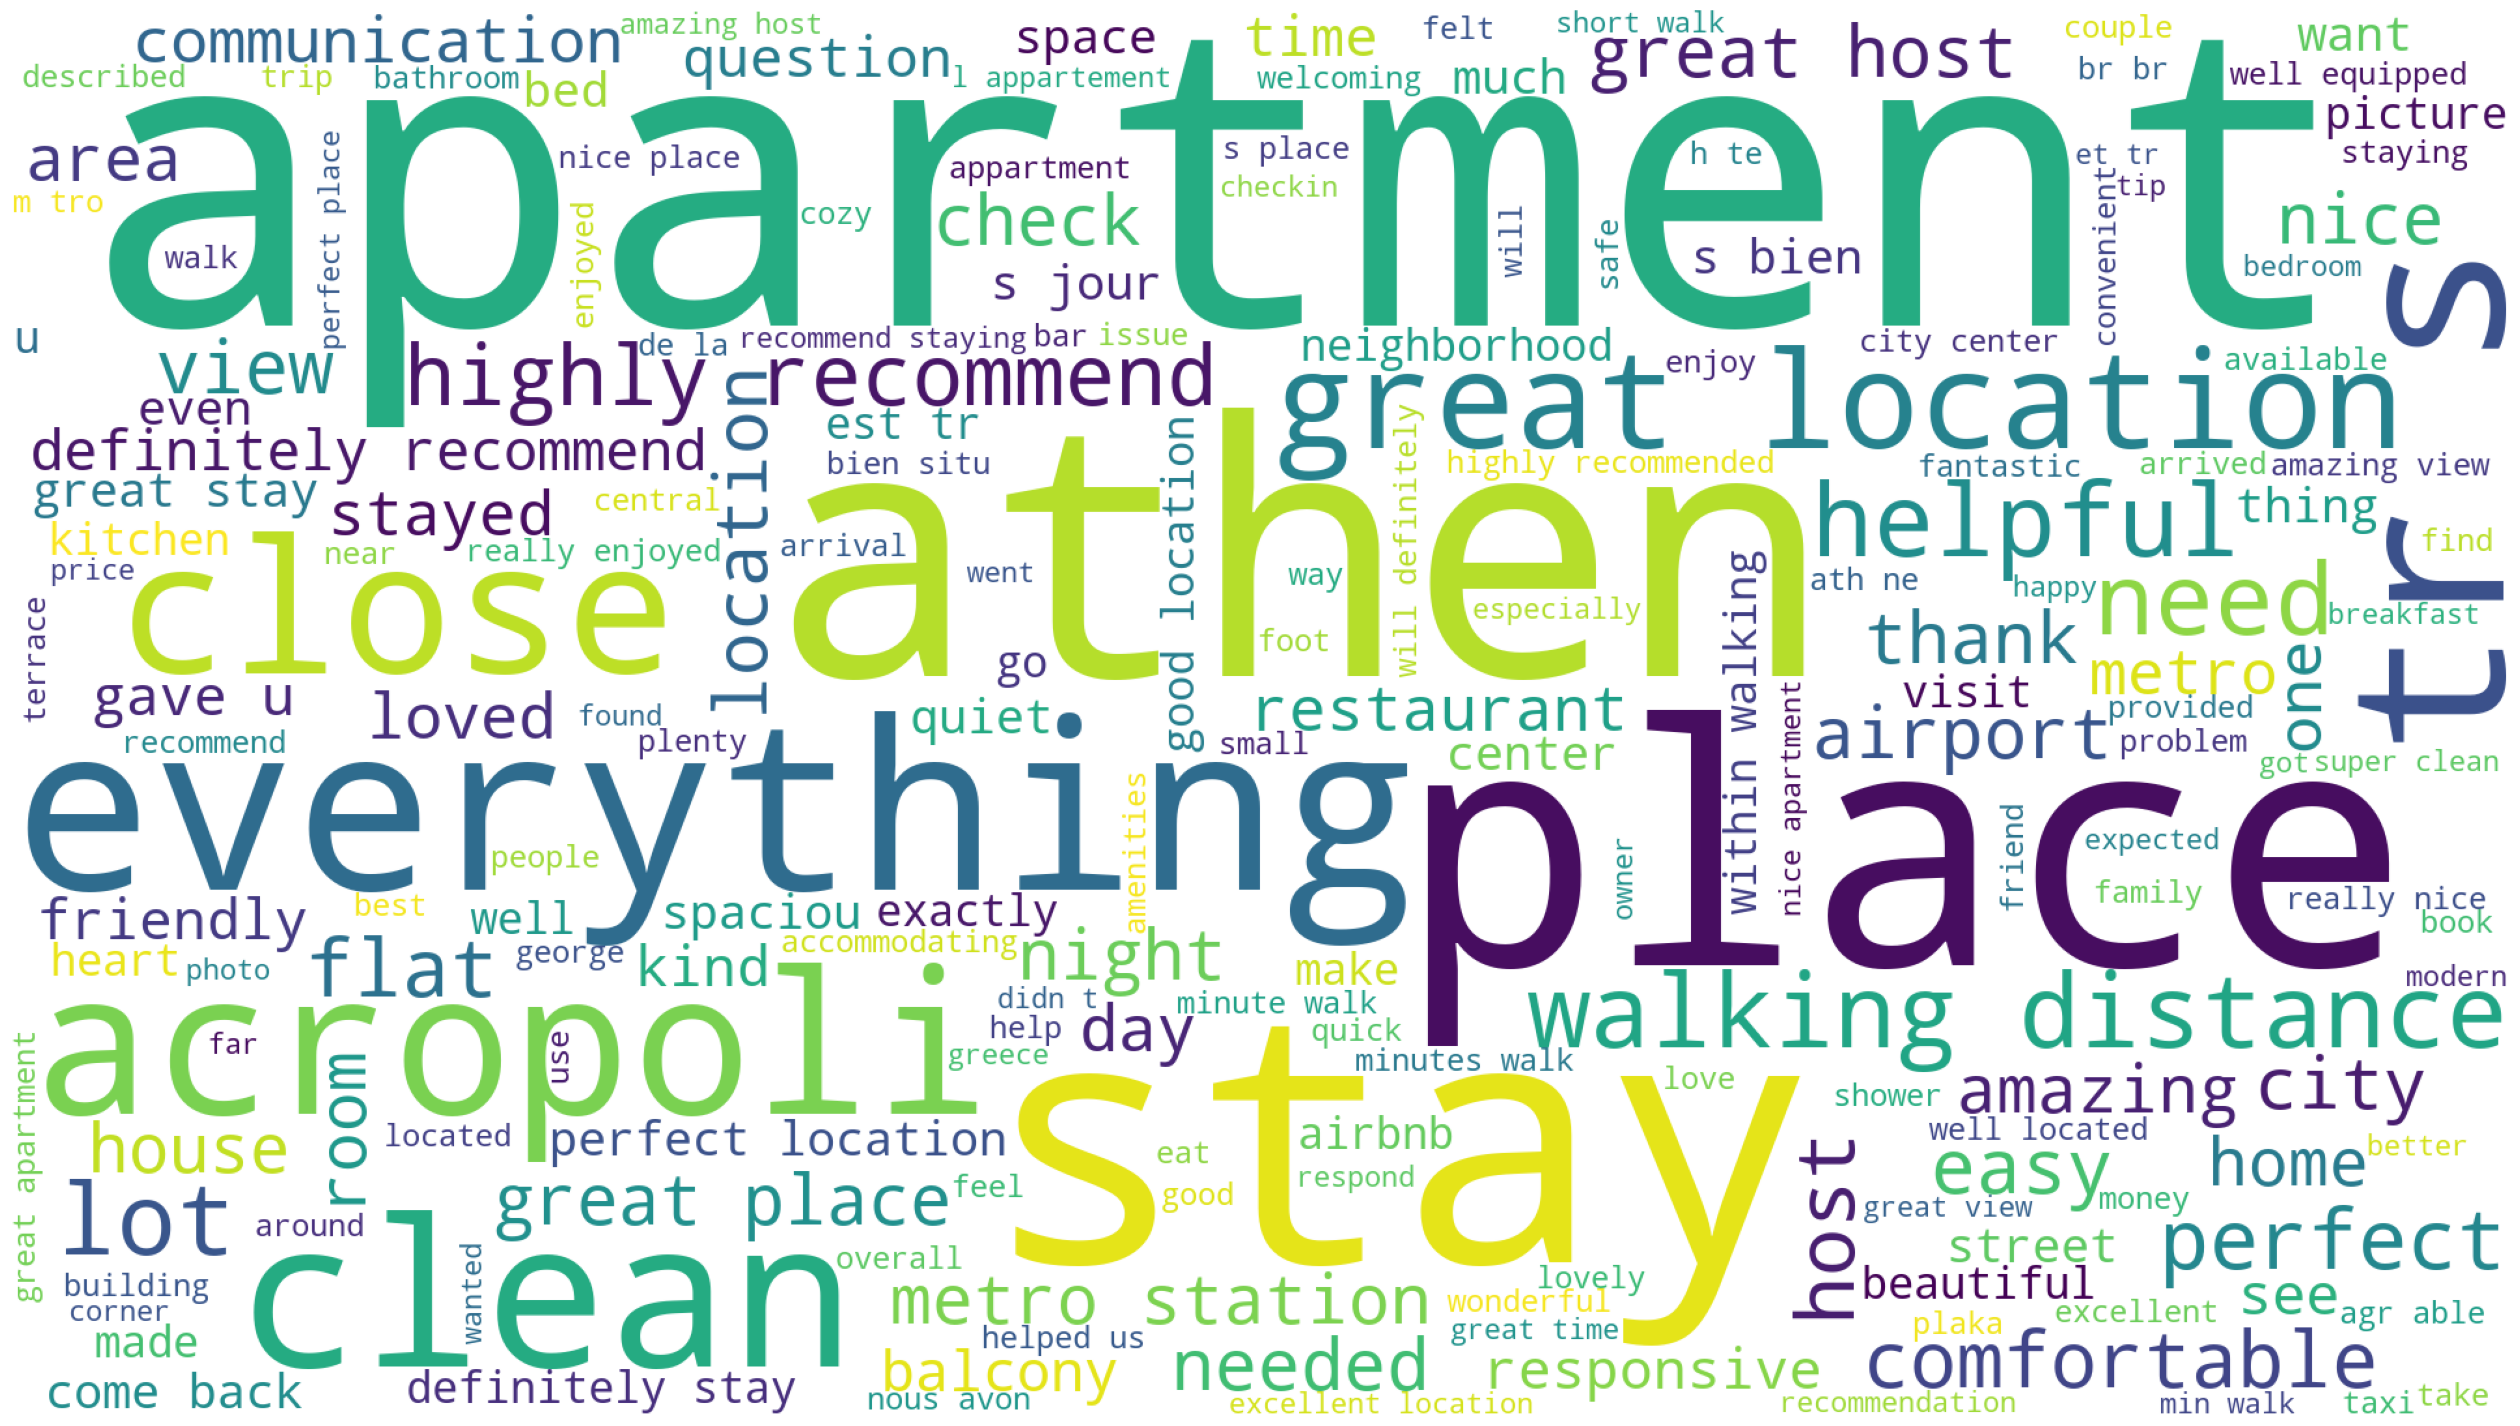

In [27]:
text = df["comments"].values
text = ' '.join(map(str, text))  # Join comments with a space character
stopwords = set(STOPWORDS)
name_wc = WordCloud(width = 1920, height = 1080, stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize = (25, 15), facecolor = None) 
plt.imshow(name_wc)
# Uncomment the following lines if you want to use a custom color function
# def grey_color_func(word, font_size, position, orientation, random_state=None,
#                     **kwargs):
#     return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
# plt.imshow(name_wc.recolor(color_func=grey_color_func, random_state=3),
#            interpolation="bilinear")
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.savefig('commentsWordCloud2.png', bbox_inches = 'tight', pad_inches = 0.1)


In [45]:
df

,listing_id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,number_of_reviews_ltm,reviewer_id,date,comments,property_type,city,rating,bedrooms,beds,baths
0,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.988630,23.765270,Entire home/apt,200,1,41,...,8,189305.0,2011-05-20,the apartment was wonderful fully equiped beau...,Condo,Athens,4.83,3,5,2
1,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.988630,23.765270,Entire home/apt,200,1,41,...,8,289831.0,2012-08-15,emmanouil was an excellent host he provided us...,Condo,Athens,4.83,3,5,2
2,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.988630,23.765270,Entire home/apt,200,1,41,...,8,2422327.0,2014-05-04,our stay in emmanouil home was comfortable qui...,Condo,Athens,4.83,3,5,2
3,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.988630,23.765270,Entire home/apt,200,1,41,...,8,2635427.0,2013-05-20,manos is a very good host he is kind and helpf...,Condo,Athens,4.83,3,5,2
4,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.988630,23.765270,Entire home/apt,200,1,41,...,8,5001999.0,2022-07-02,highly recommend this apartment clean bright a...,Condo,Athens,4.83,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498981,914583146529105583,Rental unit in Athina · ★New · 2 bedrooms · 4 ...,110277377,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.977139,23.735973,Entire home/apt,349,2,1,...,1,690088.0,2023-06-25,the place was nice and quiet with the doublepa...,Rental unit,Athina,New,2,4,2
498982,915002336511042858,Rental unit in Athina · ★New · 2 bedrooms · 3 ...,382214747,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,37.967449,23.728784,Entire home/apt,99,2,1,...,1,241198370.0,2023-06-25,1010 it was amongst the best stays i had arran...,Rental unit,Athina,New,2,3,2
498983,917863112795908399,Rental unit in Athina · ★New · 1 bedroom · 2 b...,424002907,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,37.988870,23.728830,Entire home/apt,51,1,1,...,1,73924046.0,2023-06-24,if i could give them 6 stars i would,Rental unit,Athina,New,1,2,1
498984,918253673938442892,Condo in Athina · ★New · 3 bedrooms · 5 beds ·...,434609411,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,38.006959,23.728220,Entire home/apt,76,1,1,...,1,214481225.0,2023-06-24,el alojamiento esta cerca del metro recien ref...,Condo,Athina,New,3,5,1


In [ ]:
# Convert the new cleaned file into a csv file
df.to_csv('athens_rental.csv',index=False)